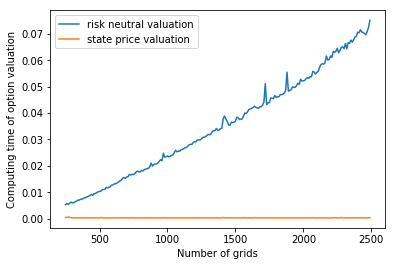

In [2]:
# Computing time comparison between risk-neutral and state price valuation

import time
import matplotlib.pyplot as plt

%matplotlib inline


def risk_neutral_valuation(M): 

    import numpy as np

    S=258; K=250; T=1; r=0.03; v=0.20;

    # M = 12*21; 
    t = np.linspace(0, T, num=M+1, endpoint=True);
    dt = t[2]-t[1];

    # Choose a parametrization
    if 0:
        # Wilmott parametrization
        U=1+v*np.sqrt(dt); 
        D=1-v*np.sqrt(dt); 
        q_u=0.5+r*np.sqrt(dt)/(2*v); 
        q_d=1-q_u; 
    elif 0:
        # CRR parametrization
        U=exp(v*np.sqrt(dt)); 
        D=exp(-v*np.sqrt(dt)); 
        q_u=(np.exp(r*dt)-D)/(U-D); 
        q_d=1-q_u; 
    elif 1:
        # JR parametrization
        U=np.exp((r-0.5*v**2)*dt+v*np.sqrt(dt)); 
        D=np.exp((r-0.5*v**2)*dt-v*np.sqrt(dt)); 
        q_u=0.5; 
        q_d=1-q_u; 

    # Option payoff at maturity
    Stock = S * D**np.arange(0,M+1) * U**np.arange(M,-1,-1);
    V_put = np.maximum(K-Stock,0);
    V_call = np.maximum(Stock-K,0);

    # Risk-neutral valuation
    for i in range(M-1,-1,-1):
        V_put = np.exp(-r*dt) * (q_u*V_put[:-1]+q_d*V_put[1:])
        V_call = np.exp(-r*dt) * (q_u*V_call[:-1]+q_d*V_call[1:]) 

    return V_put[0], V_call[0]


def state_price_valuation(M):
    
    import numpy as np
    from scipy.special import comb

    S=258; K=250; T=1; r=0.03; v=0.20;

    M = 12*21; 
    t = np.linspace(0, T, num=M+1, endpoint=True);
    dt = t[2]-t[1];

    # Choose a parametrization
    if 0:
        # Wilmott parametrization
        U=1+v*np.sqrt(dt); 
        D=1-v*np.sqrt(dt); 
        q_u=0.5+r*np.sqrt(dt)/(2*v); 
        q_d=1-q_u; 
    elif 0:
        # CRR parametrization
        U=exp(v*np.sqrt(dt)); 
        D=exp(-v*np.sqrt(dt)); 
        q_u=(np.exp(r*dt)-D)/(U-D); 
        q_d=1-q_u; 
    elif 1:
        # JR parametrization
        U=np.exp((r-0.5*v**2)*dt+v*np.sqrt(dt)); 
        D=np.exp((r-0.5*v**2)*dt-v*np.sqrt(dt)); 
        q_u=0.5; 
        q_d=1-q_u; 

    # Option value at maturity
    Stock = S * D**np.arange(0,M+1) * U**np.arange(M,-1,-1);
    V1 = np.maximum(Stock-K,0); # Call at maturity 
    V2 = np.maximum(K-Stock,0); # Put at maturity

    # State price valuation
    pi_u = np.exp(-r*dt) * q_u;
    pi_d = np.exp(-r*dt) * q_d;
    call_SP = np.sum(V1 * pi_d**np.arange(M,-1,-1) * pi_u**np.arange(0,M+1) * comb(M,np.arange(M,-1,-1))) 
    put_SP  = np.sum(V2 * pi_d**np.arange(M,-1,-1) * pi_u**np.arange(0,M+1) * comb(M,np.arange(M,-1,-1))) 
    
    return put_SP, call_SP

time_risk_neutral_valuation = []
time_state_price_valuation = [] 
M_record = []

for M in range(250, 2500, 10):
    
    M_record.append(M)
    
    tic = time.time()
    risk_neutral_valuation(M)
    time_risk_neutral_valuation.append(time.time()-tic)
    
    tic = time.time()
    state_price_valuation(M)
    time_state_price_valuation.append(time.time()-tic)
    

plt.plot(M_record, time_risk_neutral_valuation, label='risk neutral valuation')
plt.plot(M_record, time_state_price_valuation, label='state price valuation')
plt.legend()
plt.xlabel('Number of grids'); 
plt.ylabel('Computing time of option valuation')
plt.show()